# Predicting School Performance from Socioeconomic Factors
## Introduction
This analysis investigates how socioeconomic characteristics of a community and school-level factors relate to high school students’ average ACT scores. Understanding these relationships can help improve educational outcomes.

We focus on variables such as unemployment rate, percentage of adults with college degrees, median household income, percent of children in married families, and percent of students receiving free or reduced-price lunch.

## Data source
1. **EdGap data**:  This dataset contains socioeconomic factors for schools, including household income, unemployment, adult educational attainment, and family structure.
   - Source: Census Bureau’s American Community Survey.    
   - The quality of the census data and the department of education data can be assumed to be reasonably high.  
   - Access: `EdGap_data.xlsx`  
 

2. **School Information Data**:  
   Basic identifying information about schools.  
   - Source: National Center for Education Statistics (NCES).  
   - Data Quality: Public dataset, reasonably high quality.  
   - Access: `school_information.csv` from Dropbox: [Download Link](https://www.dropbox.com/s/lkl5nvcdmwyoban/ccd_sch_029_1617_w_1a_11212017.csv?dl=1)  


## Data Cleaning and Preparation
### A. Load libraries and Datasets

Before beginning, import the required Python libraries for data handling, visualization, and analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#set the plot style
sns.set_style("whitegrid")

Load EdGap Dataset and School Information Dataset

In [2]:
# Load EdGap Data
edgap = pd.read_excel('../data/EdGap_data.xlsx')

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [3]:
#Load School Information Data
school_information = pd.read_csv('../data/school_information.csv',  encoding='unicode_escape')

/var/folders/sc/pdyvxd7s6yg_4vmwpgn89ld80000gn/T/ipykernel_1372/1824140667.py:2: DtypeWarning: Columns (6,9,14,15,18,19,21,22,25,26,29,31,35,39,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  school_information = pd.read_csv('../data/school_information.csv',  encoding='unicode_escape')


### B. Inspect the Content of Each Dataset
Examine the first few rows and data types to understand the datasets and identify potential issues.

In [4]:
edgap.head()

,NCESSCH School ID,CT Unemployment Rate,CT Pct Adults with College Degree,CT Pct Childre In Married Couple Family,CT Median Household Income,School ACT average (or equivalent if SAT score),School Pct Free and Reduced Lunch
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641


In [5]:
edgap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   NCESSCH School ID                                7986 non-null   int64  
 1   CT Unemployment Rate                             7972 non-null   float64
 2   CT Pct Adults with College Degree                7973 non-null   float64
 3   CT Pct Childre In Married Couple Family          7961 non-null   float64
 4   CT Median Household Income                       7966 non-null   float64
 5   School ACT average (or equivalent if SAT score)  7986 non-null   float64
 6   School Pct Free and Reduced Lunch                7986 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 436.9 KB


The EdGap dataset contains socioeconomic and performance metrics for schools.

In [6]:
school_information.head()

,SCHOOL_YEAR,FIPST,STATENAME,ST,SCH_NAME,LEA_NAME,STATE_AGENCY_NO,UNION,ST_LEAID,LEAID,...,G_10_OFFERED,G_11_OFFERED,G_12_OFFERED,G_13_OFFERED,G_UG_OFFERED,G_AE_OFFERED,GSLO,GSHI,LEVEL,IGOFFERED
0,2016-2017,1,ALABAMA,AL,Sequoyah Sch - Chalkville Campus,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported
1,2016-2017,1,ALABAMA,AL,Camps,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported
2,2016-2017,1,ALABAMA,AL,Det Ctr,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported
3,2016-2017,1,ALABAMA,AL,Wallace Sch - Mt Meigs Campus,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported
4,2016-2017,1,ALABAMA,AL,McNeel Sch - Vacca Campus,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported


In [7]:
school_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102183 entries, 0 to 102182
Data columns (total 65 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SCHOOL_YEAR          102183 non-null  object 
 1   FIPST                102183 non-null  int64  
 2   STATENAME            102183 non-null  object 
 3   ST                   102183 non-null  object 
 4   SCH_NAME             102183 non-null  object 
 5   LEA_NAME             102183 non-null  object 
 6   STATE_AGENCY_NO      102183 non-null  object 
 7   UNION                2533 non-null    float64
 8   ST_LEAID             102183 non-null  object 
 9   LEAID                102183 non-null  object 
 10  ST_SCHID             102183 non-null  object 
 11  NCESSCH              102181 non-null  float64
 12  SCHID                102181 non-null  float64
 13  MSTREET1             102181 non-null  object 
 14  MSTREET2             1825 non-null    object 
 15  MSTREET3         

The school information dataset contains identifiers, locations, and school type data.

### C. Convert Data Types if Necessary
Before merging datasets, we need to ensure that the columns used for joining are of compatible data types. In this analysis, we will use the NCESSCH column as the key for merging.

In [8]:
school_information['NCESSCH'] = school_information['NCESSCH'].astype('object')

The school identifier column (NCESSCH) is now compatible for merging datasets.

### D. Remove Unnecessary Parts
The school information dataset includes many columns, but we only need year, school identity, location and school type information.

We will keep the columns: SCHOOL_YEAR, NCESSCH, LSTATE, LZIP, SCH_TYPE_TEXT, LEVEL, CHARTER_TEXT.

In [9]:
school_information = school_information[
    ["SCHOOL_YEAR", "NCESSCH", "LSTATE", "LZIP", "SCH_TYPE_TEXT", "LEVEL", "CHARTER_TEXT"]
]

school_information.head()

,SCHOOL_YEAR,NCESSCH,LSTATE,LZIP,SCH_TYPE_TEXT,LEVEL,CHARTER_TEXT
0,2016-2017,10000200277.0,AL,35220,Alternative School,High,No
1,2016-2017,10000201667.0,AL,36067,Alternative School,High,No
2,2016-2017,10000201670.0,AL,36784,Alternative School,High,No
3,2016-2017,10000201705.0,AL,36057,Alternative School,High,No
4,2016-2017,10000201706.0,AL,35206,Alternative School,High,No


### E. Rename Columns
To ensure consistent and descriptive variable names, we rename the columns in both datasets to lowercase snake_case format.

In [10]:
# Rename EdGap columns
edgap = edgap.rename(
    columns={ 
        "NCESSCH School ID": "id",
        "CT Pct Adults with College Degree": "percent_college",
        "CT Unemployment Rate": "rate_unemployment",
        "CT Pct Childre In Married Couple Family": "percent_married",
        "CT Median Household Income": "median_income",
        "School ACT average (or equivalent if SAT score)": "average_act",
        "School Pct Free and Reduced Lunch": "percent_lunch",
    }
)

edgap.head()

,id,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641


In [11]:
# Rename School Information Columns
school_information = school_information.rename(
    columns={
        "SCHOOL_YEAR": "year",
        "NCESSCH": "id",
        "LSTATE": "state",
        "LZIP": "zip_code",
        "SCH_TYPE_TEXT": "school_type",
        "LEVEL": "school_level",
        "CHARTER_TEXT": "charter",
    }
)

school_information.head()

,year,id,state,zip_code,school_type,school_level,charter
0,2016-2017,10000200277.0,AL,35220,Alternative School,High,No
1,2016-2017,10000201667.0,AL,36067,Alternative School,High,No
2,2016-2017,10000201670.0,AL,36784,Alternative School,High,No
3,2016-2017,10000201705.0,AL,36057,Alternative School,High,No
4,2016-2017,10000201706.0,AL,35206,Alternative School,High,No


Column names are now clear and ready for analysis.

### F. Join the Dataset
Merge EdGap and school information datasets to combine socioeconomic data with school characteristics.

We use a left join to keep all rows from the EdGap dataset.

In [12]:
df = edgap.merge(school_information, how='left', on='id')
df.head()

,id,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch,year,state,zip_code,school_type,school_level,charter
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901,2016-2017,DE,19804,Regular School,High,Yes
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412,2016-2017,DE,19709,Regular School,High,No
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816,2016-2017,DE,19709,Regular School,High,No
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960,2016-2017,DE,19958,Regular School,High,No
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641,2016-2017,DE,19934,Regular School,High,No


### G. Handle Out-of-Range Values & Missing Values
We identify and correct invalid values, and inspect missing values.

In [13]:
df.loc[df['percent_lunch'] < 0, 'percent_lunch'] = np.nan
df.loc[df['average_act'] < 1, 'average_act'] = np.nan

# Filter to high schools only
df = df.loc[df['school_level'] == 'High']

# Check for Duplicate Rows
df.duplicated().sum()

# Check missing values
df.isna().sum().to_frame(name="Number of Missing Values")


,Number of Missing Values
id,0
rate_unemployment,12
percent_college,11
percent_married,20
median_income,16
average_act,3
percent_lunch,20
year,0
state,0
zip_code,0


Some values in the dataset were invalid, so we replaced them with NaN to indicate missing or unusable data. Since ACT scores are meaningful only for high schools, we filtered the dataset to include high school records exclusively. We also identified missing values in relevant columns, which will later be handled through imputation to ensure accurate analysis.

**Drop Missing Values for ACT Scores**: Schools without ACT scores are removed, as we cannot predict performance without the target variable


In [14]:
df = df.dropna(subset=['average_act'])
df.isna().sum().to_frame(name="Number of Missing Values")

,Number of Missing Values
id,0
rate_unemployment,12
percent_college,11
percent_married,20
median_income,16
average_act,0
percent_lunch,20
year,0
state,0
zip_code,0


**Impute Missing Values for Socioeconomic Variables**: We will impute missing socioeconomic values rather than dropping rows, since removing them would discard useful information from other columns. Retaining and imputing these rows allows us to preserve as much data as possible for analysis.

In [15]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

numerical_predictors = ['rate_unemployment', 'percent_college', 'percent_married', 'median_income', 'percent_lunch']
imputer = IterativeImputer()
imputer.fit(df[numerical_predictors])
df[numerical_predictors] = imputer.transform(df[numerical_predictors])

# now we are able to replace the NaN values


After imputation, confirm that no missing values remain

In [16]:
df.isna().sum().to_frame(name="Number of Missing Values")

,Number of Missing Values
id,0
rate_unemployment,0
percent_college,0
percent_married,0
median_income,0
average_act,0
percent_lunch,0
year,0
state,0
zip_code,0


### H. Export the Dataset
Save the prepared dataset for future analysis. The dataset is now ready for analysis and can be shared or used in other notebooks.

In [17]:
df.to_csv('education_clean.csv', encoding='utf-8-sig', index=False)


## Exploratory Data Analysis

In [18]:
# Model Processing
from sklearn.preprocessing import StandardScaler

#Modeling
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Model Metrics and analysis
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.anova import anova_lm

df = pd.read_csv('../data/education_clean.csv')
df.head()

,id,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch,year,state,zip_code,school_type,school_level,charter
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901,2016-2017,DE,19804,Regular School,High,Yes
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412,2016-2017,DE,19709,Regular School,High,No
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816,2016-2017,DE,19709,Regular School,High,No
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960,2016-2017,DE,19958,Regular School,High,No
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641,2016-2017,DE,19934,Regular School,High,No


### Heatmap of Correlations
Before building a predictive model, we explored how variables relate to each other using a heatmap. This helps identify patterns in the data and shows which factors are most strongly associated with ACT scores.

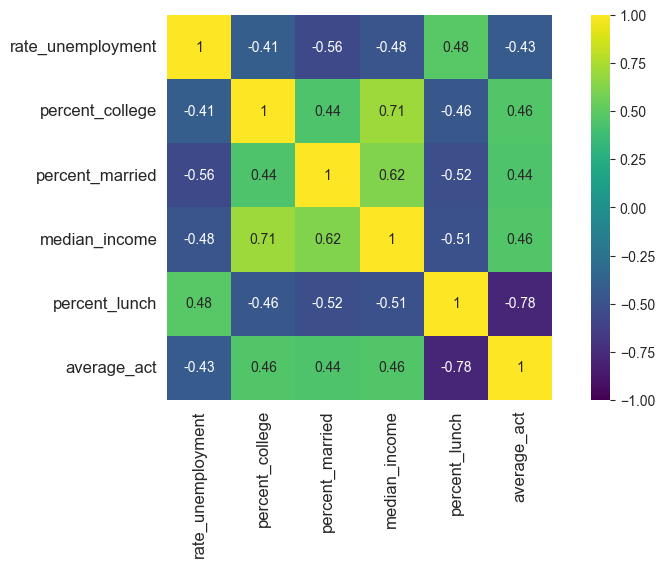

In [19]:
predictor_variables=['rate_unemployment', 'percent_college', 'percent_married', 'median_income', 'percent_lunch', 'state', 'charter']
numerical_predictors= df[predictor_variables].select_dtypes(include='number').columns.to_list()
corr_matrix = df[numerical_predictors + ['average_act']].corr()
plt.figure(figsize=(10, 5))

sns.heatmap(
    corr_matrix, vmax=1, vmin=-1, square=True, annot=True, cmap="viridis"
)

plt.tick_params(labelsize=12)
plt.show()

Interpretation: The heatmap shows how average ACT scores relate to different community factors :
- Schools in areas with higher unemployment or more students on free or reduced lunch tend to have lower ACT scores. 
- In contrast, schools in communities where more adults have college degrees, more adults are married, or household income is higher tend to have higher ACT scores. 
- The strongest connection is with free or reduced lunch: schools with more of these students generally have much lower ACT scores.

## Modeling : Simple Linear Regression
Based on our EDA, we build a simple linear regression model to see if a single socioeconomic factor can predict average ACT scores. We focus on percent_lunch — the percentage of students receiving free or reduced-price lunch because it showed the strongest negative correlation with ACT scores.


In [ ]:
# Build simple linear regression model
model = smf.ols(
    formula = 'average_act ~ percent_lunch', data =df).fit()

#print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                 1.149e+04
Date:                Tue, 21 Oct 2025   Prob (F-statistic):               0.00
Time:                        14:47:36   Log-Likelihood:                -13461.
No. Observations:                7227   AIC:                         2.693e+04
Df Residuals:                    7225   BIC:                         2.694e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        23.7429      0.037    641.745

- Schools with more low-income students tend to have lower ACT scores.
- The relationship is strong: about 61% of the differences in ACT scores between schools can be explained by this factor alone.
- Other factors, like income, adult education, and family structure, also influence ACT scores.

In short: Higher percent of students on lunch assistance is linked to lower ACT scores, but it’s not the only factor.

## Residuals and Model Accuracy

We can check how well our model predicts ACT scores by examining the residuals — the differences between observed and predicted values.

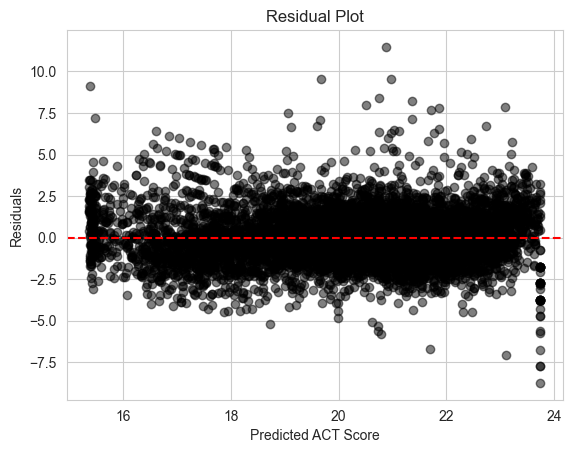

MAE: 1.17
R-squared: 0.614


In [22]:
# Predicted vs Residual Plot
y_hat = model.predict()
plt.scatter(y_hat, model.resid, alpha=0.5, color='black')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted ACT Score')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Model accuracy metrics
mae = mean_absolute_error(df['average_act'], y_hat)
r2 = r2_score(df['average_act'], y_hat)
print(f"MAE: {mae:.2f}")
print(f"R-squared: {r2:.3f}")


- Residuals are mostly scattered randomly around zero, suggesting the model predicts ACT scores reasonably well.
- Mean Absolute Error (MAE) and R-squared confirm the model’s accuracy: percent_lunch is a strong predictor, but not the only factor affecting scores.

## Conclusion
- The percentage of students receiving free or reduced-price lunch (percent_lunch) is strongly related to average ACT scores.
- This single factor alone explains about 61% of the differences in ACT scores between schools.
- Schools with higher proportions of low-income students tend to have lower ACT scores.
- While percent_lunch is important, other factors—like family income, adult education, and community characteristics—also influence performance.
- Supporting low-income students could therefore have a meaningful impact on ACT outcomes.